In [4]:
import qiskit as q
%matplotlib inline

# Designing circuit

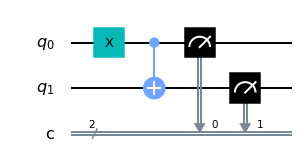

In [5]:
circuit = q.QuantumCircuit(2, 2)    # 2 Qbits, 2 Classical bits

# currently Qubits are: 0, 0
circuit.x(0)    # now Qubits are: 1, 0

circuit.cx(0, 1)    # cnot/Controlled not. It flips 2nd Qubit IFF first Qubit is 1.

circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

In [6]:
from qiskit import IBMQ
IBMQ.save_account(open('token.txt', 'r').read())
IBMQ.load_account()

configrc.store_credentials:WARNING:2020-09-19 15:32:05,319: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-09-19 15:32:06,461: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Running circuit on Quantum computer

In [29]:
from qiskit.tools.monitor import job_monitor

provider = IBMQ.get_provider('ibm-q')
backend = provider.get_backend('ibmq_santiago')

job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


# Getting results

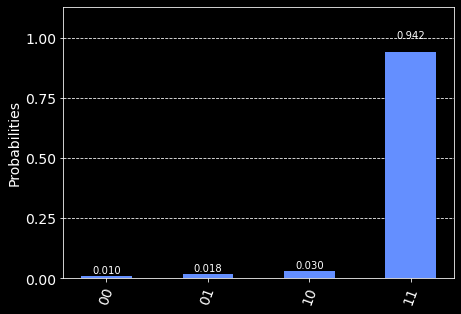

In [30]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use('dark_background')

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])